In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

zip_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/20260121 imagenes Cashcollection1.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet')

In [3]:
import os

base_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection"

files = os.listdir(base_path)
len(files), files[:10]


(850,
 ['1.jpeg',
  '102.png',
  '10.jpeg',
  '103.png',
  '104.png',
  '100.jpg',
  '101.png',
  '106.png',
  '108.png',
  '105.png'])

In [4]:
IMAGE_DIR = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection"

In [5]:
import os

image_paths = [os.path.join(IMAGE_DIR,f)
              for f in os.listdir (IMAGE_DIR)
              if f.lower().endswith((".jpg", ".jpeg", ".png", ".jfif"))]

len (image_paths), image_paths[:5]

(850,
 ['/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/1.jpeg',
  '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/102.png',
  '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/10.jpeg',
  '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/103.png',
  '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/104.png'])

# EDA

In [6]:
#LIBRERIAS
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [7]:
#Funcion de analisis de cada imagen en el dataset

def analyze_imgage(path):
  try:
    img = cv2.imread(path)
    if img is None:
      return {"path": path, "valid":False}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = gray.shape
    brightness = np.mean(gray)
    blur = cv2.Laplacian(gray, cv2.CV_64F).var()
    aspect_ratio = h/w

    return {
        "path": path,
        "valid": True,
        "height": h,
        "width": w,
        "aspect_ratio": aspect_ratio,
        "brightness": brightness,
        "blur": blur
    }
  except Exception:
    return {"path": path, "valid":False}


In [8]:
#analizar todas las imageenes

results = []

for path in tqdm(image_paths):
  results.append(analyze_imgage(path))

df = pd.DataFrame(results)
df.head()


100%|██████████| 850/850 [00:47<00:00, 17.83it/s]


,path,valid,height,width,aspect_ratio,brightness,blur
0,/content/drive/MyDrive/Colab Notebooks/Proyect...,True,1280,720,1.777778,132.240804,321.834595
1,/content/drive/MyDrive/Colab Notebooks/Proyect...,True,1599,899,1.778643,154.064963,115.237721
2,/content/drive/MyDrive/Colab Notebooks/Proyect...,True,1600,900,1.777778,71.522201,251.637275
3,/content/drive/MyDrive/Colab Notebooks/Proyect...,True,1600,1204,1.328904,169.503009,112.592732
4,/content/drive/MyDrive/Colab Notebooks/Proyect...,True,1338,540,2.477778,180.761286,1514.440442


In [9]:
#Filtrar imagenes dañadas

df_invalid = df[df["valid"] == False]
df_invalid

,path,valid,height,width,aspect_ratio,brightness,blur


In [10]:
#estadisticas generales del dataset

df_valid = df[df["valid"] == True]

df_valid.describe()

,height,width,aspect_ratio,brightness,blur
count,850.000000,850.000000,850.000000,850.000000,850.000000
mean,1504.896471,859.658824,1.819664,145.196441,355.553157
std,232.410366,211.491704,0.376696,22.350841,330.825079
min,306.000000,317.000000,0.478873,60.098081,11.713072
25%,1280.000000,720.000000,1.777778,129.834860,131.531840
50%,1599.000000,899.000000,1.777778,145.938929,248.392646
75%,1600.000000,900.000000,1.778643,160.488064,479.482894
max,4096.000000,3072.000000,3.545706,248.861338,2430.454715


# Histogramas

# Resolución (height y width)

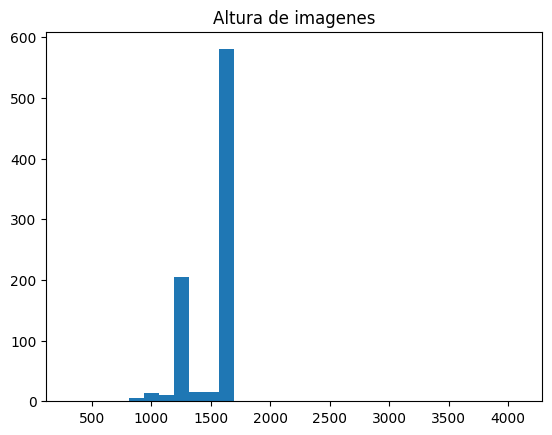

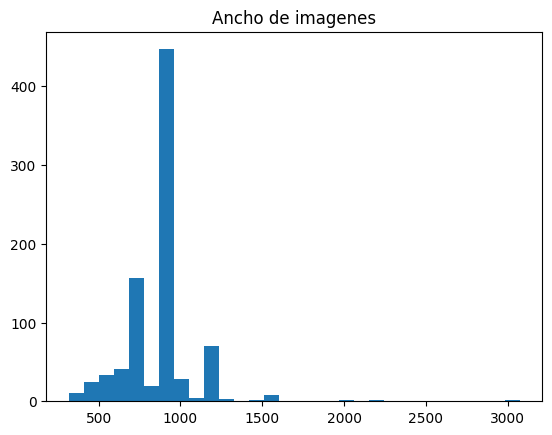

In [11]:
#resoluciones

plt.hist(df_valid["height"], bins=30)
plt.title("Altura de imagenes")
plt.show()

plt.hist(df_valid["width"], bins=30)
plt.title("Ancho de imagenes")
plt.show()

Se observa una fuente concentración en ciertas revoluciones especifícas.

Existen algunos outliers con resoluciones mayores

El dataset presenta baja variabilidad estructural en resolución, lo que favorece el entrenamiento de modelos visuales, pero podría generar sesgo si el modelo no generaliza a resoluciones distintas.

# Brillo

La iluminación es relativamente homogenea, no parece haber un subconjunto significativo de imagenes extremadamente oscuras o sobreexpuestas.

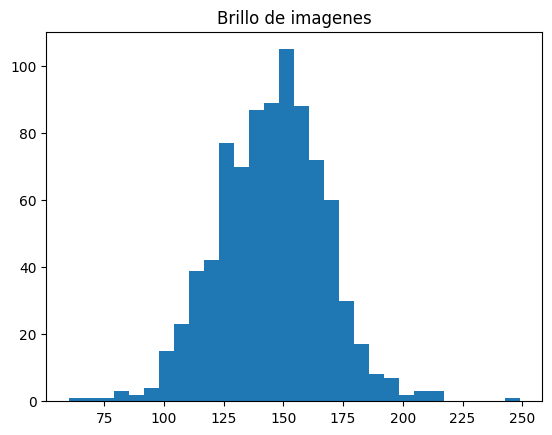

In [12]:
#brillo

plt.hist(df_valid["brightness"], bins=30)
plt.title("Brillo de imagenes")
plt.show()

# Blur

Existe una alta variabilidad en nitidez, el blur podria ser una variable crítica para explicar errores de OCR o calidad de extracción

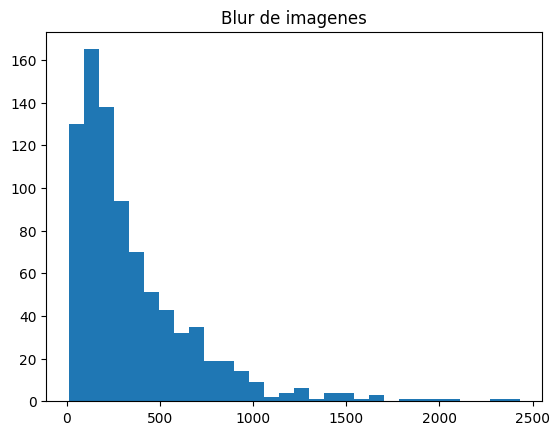

In [13]:
#BLUR enfoque

plt.hist(df_valid["blur"], bins=30)
plt.title("Blur de imagenes")
plt.show()

Las imagenes siguen un patron vertical tipico de tickets

Con esto se reduce la complejidad estuctural del dataset

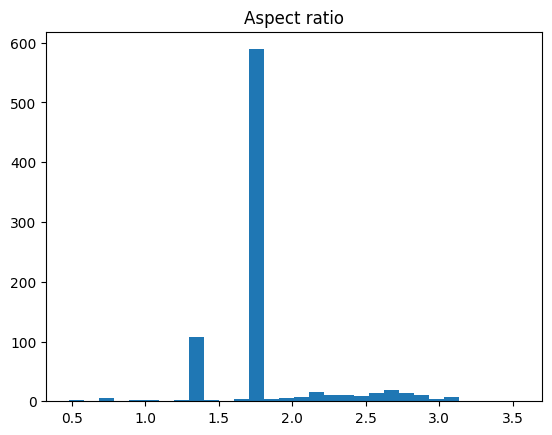

In [14]:
#aspect ratio

plt.hist(df_valid["aspect_ratio"], bins=30)
plt.title("Aspect ratio")
plt.show()

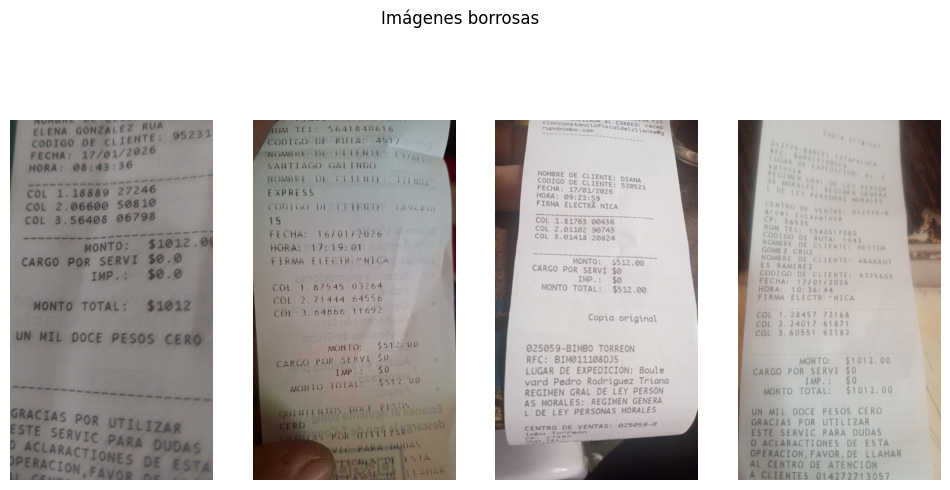

In [15]:
#visualizar alguna imagen borrosa
blurry = df_valid[df_valid["blur"] < 50].head(4)

plt.figure(figsize=(12,6))
for i, row in enumerate(blurry.itertuples()):
    img = cv2.imread(row.path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.suptitle("Imágenes borrosas")
plt.show()


# **2. FEATURE ENGINEERING**

In [16]:
#LIBRERIAS
from skimage.feature import hog
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [17]:
def extract_features(path):
    img = cv2.imread(path)
    if img is None:
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = gray.shape
    aspect_ratio = h / w
    brightness = np.mean(gray)
    contrast = np.std(gray)
    blur = cv2.Laplacian(gray, cv2.CV_64F).var()

    edges = cv2.Canny(gray, 50, 150)
    edge_density = np.mean(edges)

    # HOG features
    hog_features, _ = hog(
        gray,
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        visualize=True,
        feature_vector=True
    )
    hog_features = hog_features[:100]  # reducimos dimensiones

    data = {
        "path": path,
        "height": h,
        "width": w,
        "aspect_ratio": aspect_ratio,
        "brightness": brightness,
        "contrast": contrast,
        "blur": blur,
        "edge_density": edge_density,
    }

    # anexar hog features
    for i, v in enumerate(hog_features):
        data[f"hog_{i}"] = v

    return data

features = []
for img_path in tqdm(image_paths):
    f = extract_features(img_path)
    if f: features.append(f)

df_features = pd.DataFrame(features)
df_features.head()

100%|██████████| 850/850 [15:39<00:00,  1.11s/it]


,path,height,width,aspect_ratio,brightness,contrast,blur,edge_density,hog_0,hog_1,...,hog_90,hog_91,hog_92,hog_93,hog_94,hog_95,hog_96,hog_97,hog_98,hog_99
0,/content/drive/MyDrive/Colab Notebooks/Proyect...,1280,720,1.777778,132.240804,43.867640,321.834595,14.397152,0.488254,0.488254,...,0.283889,0.024411,0.434667,0.346916,0.434667,0.434667,0.450303,0.302597,0.450303,0.083581
1,/content/drive/MyDrive/Colab Notebooks/Proyect...,1599,899,1.778643,154.064963,26.824962,115.237721,23.149372,0.359926,0.326902,...,0.432022,0.188560,0.432022,0.352661,0.432022,0.222936,0.482478,0.137040,0.482478,0.000000
2,/content/drive/MyDrive/Colab Notebooks/Proyect...,1600,900,1.777778,71.522201,56.721843,251.637275,9.143167,0.516957,0.205438,...,0.072575,0.000000,0.171962,0.000000,0.692460,0.045316,0.544199,0.072880,0.544199,0.000000
3,/content/drive/MyDrive/Colab Notebooks/Proyect...,1600,1204,1.328904,169.503009,15.576418,112.592732,7.350311,0.658585,0.000000,...,0.353076,0.000000,0.540935,0.000000,0.411921,0.000000,0.613762,0.000000,0.425813,0.000000
4,/content/drive/MyDrive/Colab Notebooks/Proyect...,1338,540,2.477778,180.761286,44.237811,1514.440442,16.575071,0.371615,0.371615,...,0.453040,0.453040,0.453040,0.453040,0.227139,0.080104,0.310582,0.151442,0.450743,0.450743


In [18]:
#Escalamiento StandadrScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_features.drop(columns=["path"])),
    columns = df_features.drop(columns=["path"]).columns
)

df_scaled.head()

,height,width,aspect_ratio,brightness,contrast,blur,edge_density,hog_0,hog_1,hog_2,...,hog_90,hog_91,hog_92,hog_93,hog_94,hog_95,hog_96,hog_97,hog_98,hog_99
0,-0.968239,-0.660740,-0.111260,-0.579990,-0.235293,-0.101983,0.133653,0.502237,1.657864,1.110917,...,-0.467601,-1.173729,0.145822,0.754255,0.758198,1.185961,0.075918,0.390812,0.829669,-0.797641
1,0.405141,0.186127,-0.108961,0.397021,-1.314244,-0.726840,1.399802,-0.513340,0.554652,0.118606,...,0.685542,-0.229457,0.127910,0.793611,0.738120,-0.034819,0.302813,-0.731363,1.077739,-1.271137
2,0.409446,0.190858,-0.111260,-3.298203,0.578490,-0.314296,-0.626420,0.729397,-0.275834,1.332873,...,-2.112577,-1.314153,-1.633385,-1.622238,2.715257,-1.058925,0.738068,-1.166247,1.553612,-1.271137
3,0.409446,1.629113,-1.303570,1.088142,-2.026375,-0.734840,-0.885785,1.850230,-1.680477,-1.636661,...,0.070984,-1.314153,0.865537,-1.622238,0.585527,-1.320203,1.228628,-1.660244,0.640850,-1.271137
4,-0.718534,-1.512338,1.748097,1.592145,-0.211858,3.505084,0.448724,-0.420835,0.860371,0.208992,...,0.849162,1.291970,0.270262,1.481240,-0.817265,-0.858346,-0.909397,-0.633739,0.833061,1.282371


In [19]:
#Escalamiento MIN MAX
scaler2 = MinMaxScaler()
df_scaled2 = pd.DataFrame(
    scaler2.fit_transform(df_features.drop(columns=["path"])),
    columns=df_features.drop(columns=["path"]).columns
)
df_scaled2.head()

,height,width,aspect_ratio,brightness,contrast,blur,edge_density,hog_0,hog_1,hog_2,...,hog_90,hog_91,hog_92,hog_93,hog_94,hog_95,hog_96,hog_97,hog_98,hog_99
0,0.256992,0.146279,0.423533,0.382186,0.363831,0.128216,0.217161,0.488254,0.724846,0.724212,...,0.405590,0.034876,0.434667,0.561869,0.627714,0.615575,0.450303,0.446741,0.649545,0.105866
1,0.341161,0.211252,0.423815,0.497803,0.157359,0.042801,0.358656,0.359926,0.485308,0.533868,...,0.617226,0.269395,0.432022,0.571174,0.623894,0.315722,0.482478,0.202320,0.695956,0.000000
2,0.341425,0.211615,0.423533,0.060521,0.519561,0.099194,0.132221,0.516957,0.304987,0.766788,...,0.103687,0.000000,0.171962,0.000000,1.000000,0.064176,0.544199,0.107598,0.784986,0.000000
3,0.341425,0.321960,0.277169,0.579588,0.021082,0.041707,0.103236,0.658585,0.000000,0.197174,...,0.504436,0.000000,0.540935,0.000000,0.594867,0.000000,0.613762,0.000000,0.614220,0.000000
4,0.272296,0.080944,0.651781,0.639230,0.368316,0.621285,0.252371,0.371615,0.551688,0.551206,...,0.647256,0.647256,0.453040,0.733749,0.328017,0.113443,0.310582,0.223583,0.650180,0.570920


In [20]:
#seleccion de caracteristicas
#umbral de varianza

sel = VarianceThreshold(threshold=0.01)
df_var = sel.fit_transform(df_scaled)

df_var.shape

(850, 107)

<Axes: >

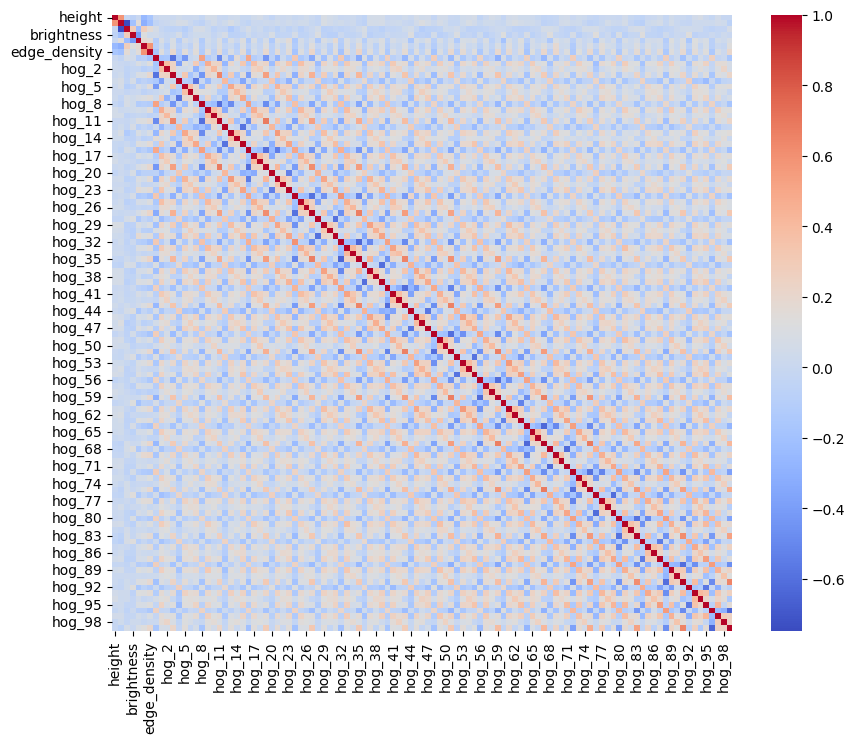

In [21]:
#correlacion-eliminacion de variables redundantes
corr = df_scaled.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm")


In [22]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df_scaled)

print("Varianza explicada:", pca.explained_variance_ratio_)

Varianza explicada: [0.15831076 0.08361477 0.04854815 0.03721311 0.03420728 0.0279454
 0.02448786 0.02241646 0.02053628 0.01802212]



Cargas factoriales:
                Factor_1    Factor_2    Factor_3
height       -122.596083  183.313559  -72.913171
width        -116.590703  126.482319  122.815533
aspect_ratio    0.133198   -0.041470   -0.314447
brightness      3.293223   -0.932324   -3.620569
blur          312.861820  106.625544    7.996099


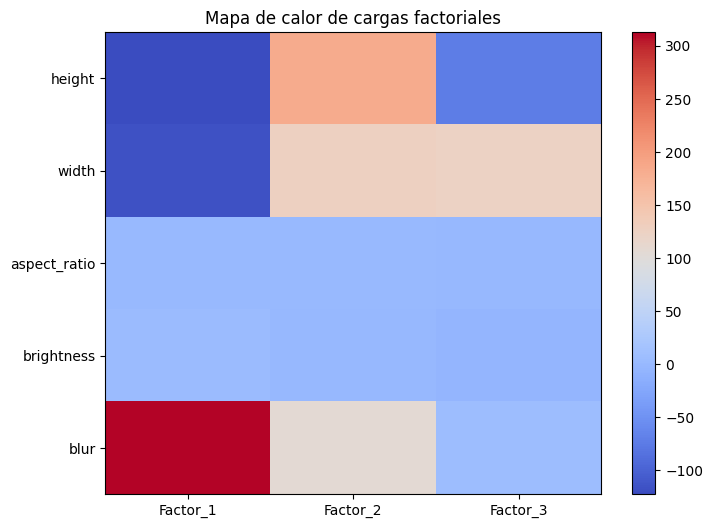

In [23]:
# df_num debe contener SOLO columnas numéricas
df_num = df.select_dtypes(include=['int64','float64'])

# Crear el modelo (prueba con 2, 3 o 4 factores)
fa = FactorAnalysis(n_components=3, random_state=42)
fa_fit = fa.fit(df_num)

# 1. Mostrar las cargas factoriales
loadings = pd.DataFrame(
    fa.components_.T,
    columns=[f"Factor_{i+1}" for i in range(fa.n_components)],
    index=df_num.columns
)

print("\nCargas factoriales:")
print(loadings)

# 2. Gráfica de cargas factoriales
plt.figure(figsize=(8,6))
plt.imshow(loadings, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(loadings.columns)), loadings.columns)
plt.yticks(range(len(loadings.index)), loadings.index)
plt.title('Mapa de calor de cargas factoriales')
plt.show()


In [24]:
!apt-get install tesseract-ocr -y
!pip install pytesseract opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [25]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/10.jpeg"

In [26]:
import pytesseract
import re
import os
import pandas as pd
from PIL import Image

In [27]:
def extraer_cols_desde_texto(texto):

    patron = r'COL\s*(\d)\.(\d{4,6})\s+(\d{4,6})'

    coincidencias = re.findall(patron, texto)

    resultado = {
        "COL_1": None,
        "COL_2": None,
        "COL_3": None
    }

    for col_num, num1, num2 in coincidencias:
        valor = f"{num1} {num2}"

        if col_num == "1":
            resultado["COL_1"] = valor
        elif col_num == "2":
            resultado["COL_2"] = valor
        elif col_num == "3":
            resultado["COL_3"] = valor

    return resultado

In [28]:
def extraer_cols_desde_texto(texto):

    patron = r'COL\s*(\d)\.(\d{4,6})\s+(\d{4,6})'

    coincidencias = re.findall(patron, texto)

    resultado = {
        "COL_1": None,
        "COL_2": None,
        "COL_3": None
    }

    for col_num, num1, num2 in coincidencias:
        valor = f"{num1} {num2}"

        if col_num == "1":
            resultado["COL_1"] = valor
        elif col_num == "2":
            resultado["COL_2"] = valor
        elif col_num == "3":
            resultado["COL_3"] = valor

    return resultado

In [29]:
def procesar_ticket(ruta_imagen):

    img = Image.open(ruta_imagen)

    texto = pytesseract.image_to_string(img, lang='eng')

    resultado_cols = extraer_cols_desde_texto(texto)

    return resultado_cols

In [30]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection/1.jpeg"

resultado = procesar_ticket(ruta)

print(resultado)

{'COL_1': '15355 50899', 'COL_2': '01146 94344', 'COL_3': '01816 44947'}


In [31]:
def procesar_carpeta():

    carpeta = "/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/dataset_bimbonet/20260121 imagenes Cashcollection"

    resultados = []

    for archivo in os.listdir(carpeta):

        if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):

            ruta = os.path.join(carpeta, archivo)

            datos_cols = procesar_ticket(ruta)

            fila = {
                "archivo": archivo,
                "COL_1": datos_cols["COL_1"],
                "COL_2": datos_cols["COL_2"],
                "COL_3": datos_cols["COL_3"]
            }

            resultados.append(fila)

    df = pd.DataFrame(resultados)

    return df

In [32]:
df_resultados = procesar_carpeta()
df_resultados

,archivo,COL_1,COL_2,COL_3
0,1.jpeg,15355 50899,01146 94344,01816 44947
1,102.png,30556 59450,51144 64548,91826 13566
2,10.jpeg,15869 47453,66601 50814,56408 09133
3,103.png,None,20063 66578,60850 53968
4,104.png,39506 74158,None,91374 12101
...,...,...,...,...
809,base64decoded - 2026-01-21T164249.645.jpeg,84501 34813,13180 96575,81870 35582
810,base64decoded - 2026-01-21T164259.147.jpeg,None,None,None
811,base64decoded - 2026-01-21T164535.581.jpg,85416 14130,60133 91470,91374 88778
812,base64decoded - 2026-01-21T164543.932.jpeg,43524 59105,23130 91543,61314 39170
